# Importing Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Importing the dataset as DataFrame and Data exploration 

In [4]:
df = pd.read_csv("thyroidDF.csv")

In [5]:
df.head(10)

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   
5   60   F            f                  f                   f    f        f   
6   77   F            f                  f                   f    f        f   
7   28   F            f                  f                   f    f        f   
8   28   F            f                  f                   f    f        f   
9   28   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   
5               f              f                 f  ...    NaN            f   
6               f              f                 f  ...    NaN            f   
7               f              f                 f  ...  116.0            f   
8               f              f                 f  ...   76.0            f   
9               f              f                 f  ...   83.0            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  
5 NaN            f NaN            t  26.0            other      -   840803048  
6 NaN            f NaN            t  21.0            other      -   840803068  
7 NaN            f NaN            f   NaN              SVI      -   840807019  
8 NaN            f NaN            f   NaN            other      -   840808060  
9 NaN            f NaN            f   NaN            other      -   840808073  

[10 rows x 31 columns]

In [6]:
# Total number of rows and columns
row, columns = df.shape
print(f'Total number of rows: {row}')
print(f'Total number of columns: {columns}')

Total number of rows: 9172
Total number of columns: 31


In [7]:
# Total number of duplicate rows
df.duplicated().sum()

0

In [8]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

The “Thyroid Disease Data” UCI Machine Learning dataset contains 9,172 rows and 31 columns, with no duplicate values. However, there are significant number of missing values in the columns: Sex, TSH, T3, TT4, T4U, FTI, and TBG, with TBG column leading with 8823 null entries. 

In [10]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
# Counting the frequency of each distinct value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

The dataset contains twice as many females as males health data. 

In [13]:
# Unique values in 'TSH_measured' column
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [14]:
# Filtering the unique values in the 'TSH' column for rows where 'TSH_measured' is not measured to find the erroneous data. 
df['TSH'][df['TSH_measured'] == 'f'].unique()

array([nan])

In [15]:
# Counting the number of missing TSH values for patients where TSH was not measured
df['TSH'][df['TSH_measured'] == 'f'].isnull().sum()

842

In [16]:
# Counting of missing values in TSH
df['TSH'].isnull().sum()

842

The dataset has no erroneous data related to the TSH measurements. The data marked with 'f' in 'TSH_measured' has no corresponding values in 'TSH' column which is correct. 

In [18]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [19]:
# Filtering the unique values in the 'T3' column for rows where 'T3_measured' is 'f' to validate the data. 
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [20]:
# Counting the number of missing T3 values for patients where T3 was not measured
df['T3'][df['T3_measured'] == 'f'].isnull().sum()

2604

In [21]:
# Counting of missing values in T3
df['T3'].isnull().sum()

2604

Similarly, the dataset has no erroneous data related to the T3 measurements. The data marked with 'f' in 'T3_measured' has no corresponding values in 'T3' column which is correct. 

In [23]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [24]:
# Filtering distinct values in the 'TT4' column for rows where 'TT4_measured' is 'f' 
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [25]:
# Counts the number of missing TT4 values for patients where TT4 was not measured
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

In [26]:
# Count of missing values in TT4
df['TT4'].isnull().sum()

442

Similarly, the dataset has no erroneous data related to the TT4 measurements. The data marked with 'f' in 'TT4_measured' has no corresponding values in 'TT4' column which is correct. 

In [28]:
# Unique values in 'T4U_measured' column
df['T4U_measured'].unique()

array(['f', 't'], dtype=object)

In [29]:
# Filtering the unique values 'T4U' column for rows where 'T4U_measured' is 'f'
df['T4U'][df['T4U_measured'] == 'f'].unique()

array([nan])

In [30]:
# Counting the number of missing T4U values for patients where T4U was not measured
df['T4U'][df['T4U_measured'] == 'f'].isnull().sum()

809

In [31]:
# Counting of missing values in T4U
df['T4U'].isnull().sum()

809

Similarly, the dataset has no erroneous data related to the T4U measurements. The data marked with 'f' in 'T4U_measured' has no corresponding values in 'T4U' column which is correct. 

In [33]:
# Unique values in 'FTI_measured' column
df['FTI_measured'].unique()

array(['f', 't'], dtype=object)

In [34]:
# Extracting the unique values in the 'FTI' column for rows where 'FTI_measured' is 'f'
df['FTI'][df['FTI_measured'] == 'f'].unique()

array([nan])

In [35]:
# Counting the number of missing FTI values for patients where FTI was not measured
df['FTI'][df['FTI_measured'] == 'f'].isnull().sum()

802

In [36]:
# Counting of missing values in FTI
df['FTI'].isnull().sum()

802

Similarly, the dataset has no erroneous data related to the FTI measurements. The data marked with 'f' in 'FTI_measured' has no corresponding values in 'FTI' column which is correct. 

In [38]:
# Unique values in 'TBG_measured' column
df['TBG_measured'].unique()

array(['f', 't'], dtype=object)

In [39]:
# Filtering the distinct values in the 'TBG' column for rows where 'TBG_measured' is 'f'
df['TBG'][df['TBG_measured'] == 'f'].unique()

array([nan])

In [40]:
# Counting the number of missing TBG values for patients where TBG was not measured
df['TBG'][df['TBG_measured'] == 'f'].isnull().sum()

8823

In [41]:
# Counting of missing values in TBG
df['TBG'].isnull().sum()

8823

Similarly, the dataset has no erroneous data related to the TBG measurements. The data marked with 'f' in 'TBG_measured' has no corresponding values in 'TBG' column which is correct. 

**Conclusion:** 

Based on analysis, the dataset has no error entries in TSH, T3, TT4, T4U, FTI, and TBG measurements as null values in the TSH, T3, TT4, T4U, FTI, and TBG columns has corresponding TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured, and TBG_measured values with the 'f' values. For the patients where the test were not taken, there is no measured value or data. 

# Feature Engineering

In [45]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Diagnosis**

The diagnosis data was categorized into 6 large cases: 

1. hyperthyroid_conditions class: Hyperthyroid conditions (Overactive thyroid). Include: A-hyperthyroid, B - T3 toxic, C - toxic goitre, D - secondary toxic.
2. hypothyroid_conditions class: Hypothyroid conditions (Underactive thyroid). Include: E - hypothyroid, F - primary hypothyroid, G - compensated hypothyroid, H - secondary hypothyroid.
3. replacement_therapy class: Replacement Therapy (Patients already diagnosed with hypothyroidism and are being treated with synthetic thyroid hormones). Include: L - Consistent with replacement therapy, M - Underreplaced, N - Overreplaced.
4. non_thyroidal_illness class: (TBG-related (Thyroxine-binding globulin) problems which may influence the lab results), including I - Increased binding protein, J - Decreased binding protein. General health condition (Which can also affect the lab results), including K - Concurrent non-thyroidal illness. Additionally, S - Elevated TBG, T - Elevated thyroid hormones.
5. under_treatment class: Antithyroid Treatment (Patients already diagnosed with hyperthyroidism and being treated to reduce hormone levels). Include: O - Antithyroid drugs, P - I131 treatment, Q - Surgery. 
6. normal_conditions class: without disease,  '-'. 

The diagnosis in the form of  "X|Y" is interpreted as "consistent with X, but more likely Y". Such cases were interpreted as X cases. 

Entries with R mark - Discordant assay results was initially skipped as it include data points with clear lab errors. 


In [47]:
# Defining  diagnosis groups 

hyperthyroid_conditions = ['A', 'B', 'C', 'D']  #Hyperthyroid
hypothyroid_conditions = ['E', 'F', 'G', 'H'] #Hypothyroid
replacement_therapy = ['L', 'M', 'N'] #Related to synthetic hormone use
non_thyroidal_illness  = ['I', 'J', 'K', 'S', 'T']	#Indirect or related issues
under_treatment = ['O', 'P', 'Q'] #Due to the interventions
normal_conditions = ['-'] #Negative

# Mapping logic
def categorize_target(value):
    diagnoses = value.split('|')
    
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
        if diagnosis in replacement_therapy:
            return 'Replacement Therapy'
        if diagnosis in non_thyroidal_illness:
            return 'Non-thyroidal Illness'
        if diagnosis in under_treatment:
            return 'Treatment Effect'
        if diagnosis in normal_conditions:
            return 'Negative'
    
# Apply the categorization to DataFrame
df['target'] = df['target'].apply(categorize_target)

In [48]:
#Unique Classes in 'target' column after mapping 
df['target'].unique()

array(['Negative', 'Non-thyroidal Illness', 'Hypothyroid', None,
       'Replacement Therapy', 'Hyperthyroid', 'Treatment Effect'],
      dtype=object)

In [49]:
#  Counting the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative                 6771
Non-thyroidal Illness     897
Hypothyroid               601
Replacement Therapy       336
Hyperthyroid              195
Treatment Effect           33
Name: count, dtype: int64

As shown above that the dataset is highly imbalanced, with "Negative" class dominating the dataset. This issue will be addressed in further steps

In [51]:
# Counting the missing values in 'target' column
df['target'].isnull().sum()

339

After mapping we have 339 without target value that will be dropped. 

# Vizualisation

In [54]:
class_map = {
    0: "Hyperthyroid",
    1: "Hypothyroid",
    2: "Negative",
    3: "Non-thyroidal Illness",
    4: "Replacement Therapy",
    5: "Treatment Effect"
}

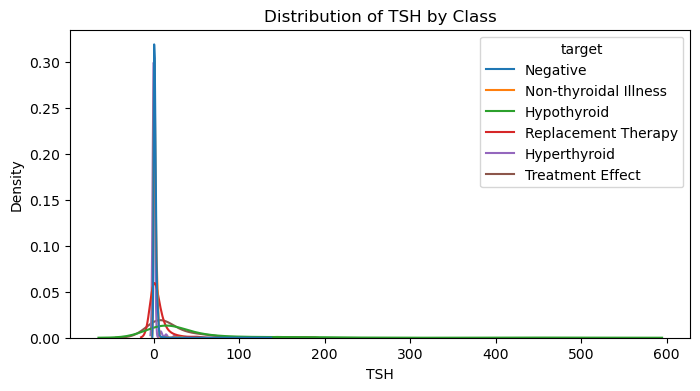

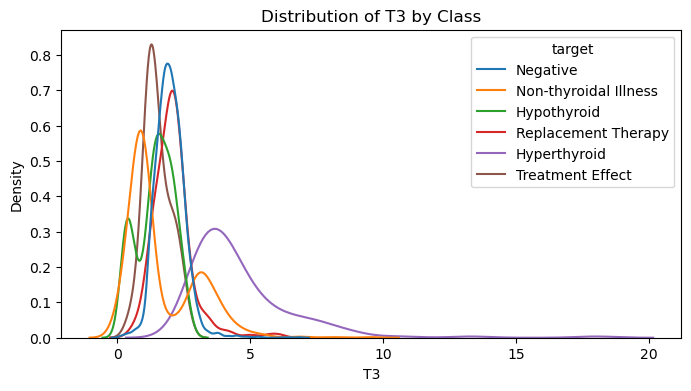

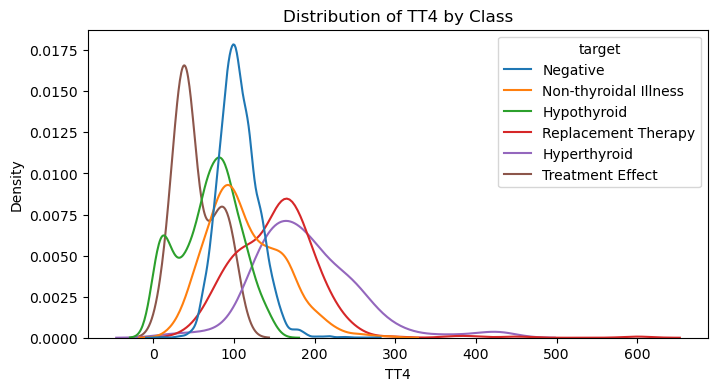

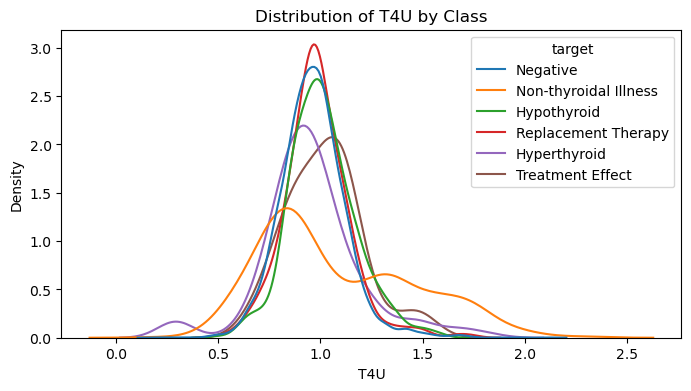

In [55]:
features_to_plot = ['TSH', 'T3', 'TT4', 'T4U'] 

for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='target', common_norm=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()


## Data Cleaning
The missing values were handled using appropriate imputation method: 

1. Columns with missed 'target' value were dropped. 
2. Missing values in the 'Sex' column were imputed using the mode of the column.
3. Missing values in TSH, T3, TT4, T4U were imputed with the median of the respective columns.
4. The TBG column was dropped entirely due a notable number of null entries in it, particularly, 8823 null values.
5. Additionaly, the 'referral_source' and 'patient_id' were dropped as they do not contribute to the models.


In [57]:
# Dropping null values in the target column 
df = df.dropna(subset=['target'])

In [58]:
# Imputing the missing values in 'sex' column with mode which is 'F' - Female 
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [59]:
# The column 'Sex' after cleaning 
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [60]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Additional to the 'TBG' column, the columns 'referral_source' ,'patient_id' were dropped as they do not contribute to the analysis and prediction. Then, the *measured flags were dropped as the null values will be imputed. 

In [62]:
# List of columns that were dropped
col_to_drop = ['TBG', 'TBG_measured', 'patient_id', 'referral_source']

In [63]:
# Dropping the columns in the 'col_to_drop' list 
df.drop(col_to_drop, axis = 1, inplace = True)

In [64]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'target'],
      dtype='object')

In [65]:
# List of columns still containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [66]:
# Correlating the columns in 'col_with_null' to find the suitable imputation method and finding if the column should be kept  
correlation_matrix = df[col_with_null].corr()
print(correlation_matrix)

          TSH        T3       TT4       T4U       FTI
TSH  1.000000 -0.155049 -0.280236  0.077200 -0.302004
T3  -0.155049  1.000000  0.577729  0.338405  0.440449
TT4 -0.280236  0.577729  1.000000  0.395320  0.771954
T4U  0.077200  0.338405  0.395320  1.000000 -0.205955
FTI -0.302004  0.440449  0.771954 -0.205955  1.000000


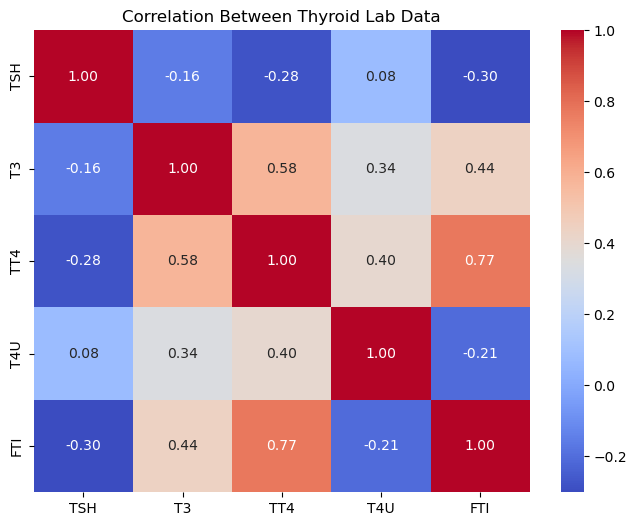

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Thyroid Lab Data')
plt.show()

Based on correlation matrix, we found that there are strong correlations between 'TT4' and 'FTI' columns (77%), and moderate correlation between the columns 'T3' and 'TT4' (58%) , 'TT4' and 'T4U' (40%), 'T3' and 'FTI' (44%) columns. 

Columns that have weak/moderate correlation with other columns are TSH, T3, T4U, these columns should be kept in. 

Columns 'TT4' and 'FTI' have strong correlation score of 75%. In most cases, FTI is calculated from devision of TT4 by T4U, however, it has huge predicting impact on models, so 'FTI' was also kept. 

In [69]:
#Shape of the current df 
df.shape

(8833, 27)

In [70]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    71,
          67,    55,    61,    46,    44,    82,    64,    70,    33,
          59,    53,    52,    49,    35,    48,    27,    69,    76,
          73,    68,    66,    30,    88,    58,    21,    38,    45,
          83,    62,    25,    86,    75,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
          91,     5,    94,     7,     4, 65511,    95, 65512,     3,
       65526])

There are some discrepencies in the 'age' column. It is containing values like 455, 65511, 65512, and 65526 which indicates to the inconsistent data points.

In [72]:
# Filtering the values in 'age' column 
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48, 27,
       69, 76, 73, 68, 66, 30, 88, 58, 21, 38, 45, 83, 62, 25, 86, 75, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93, 91,  5, 94,  7,  4, 95,  3])

In [73]:
df.shape

(8829, 27)

In [74]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_meds, sick, pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI, target]
Index: []

[0 rows x 27 columns]

There are no instances in the dataset where a "Male" is marked as "pregnant." This is a logical result and validates the integrity of the data for this specific condition.

Checking the lab data for the outliers and possible errors. 

In [77]:
print(df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']].describe())

               TSH           T3          TT4          T4U          FTI
count  7990.000000  6250.000000  8387.000000  8031.000000  8038.000000
mean      5.149526     1.983614   107.767576     0.980367   111.741589
std      24.439711     0.886775    36.828901     0.198609    38.038490
min       0.005000     0.050000     2.000000     0.170000     1.400000
25%       0.492500     1.500000    87.000000     0.860000    93.000000
50%       1.400000     1.900000   104.000000     0.960000   108.000000
75%       2.700000     2.300000   124.000000     1.070000   126.000000
max     530.000000    18.000000   600.000000     2.330000   839.000000


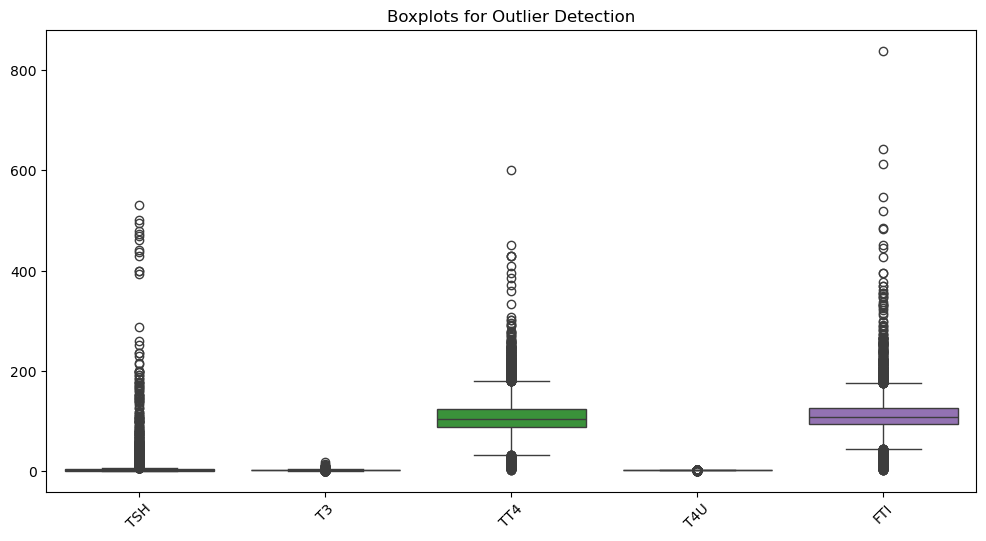

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

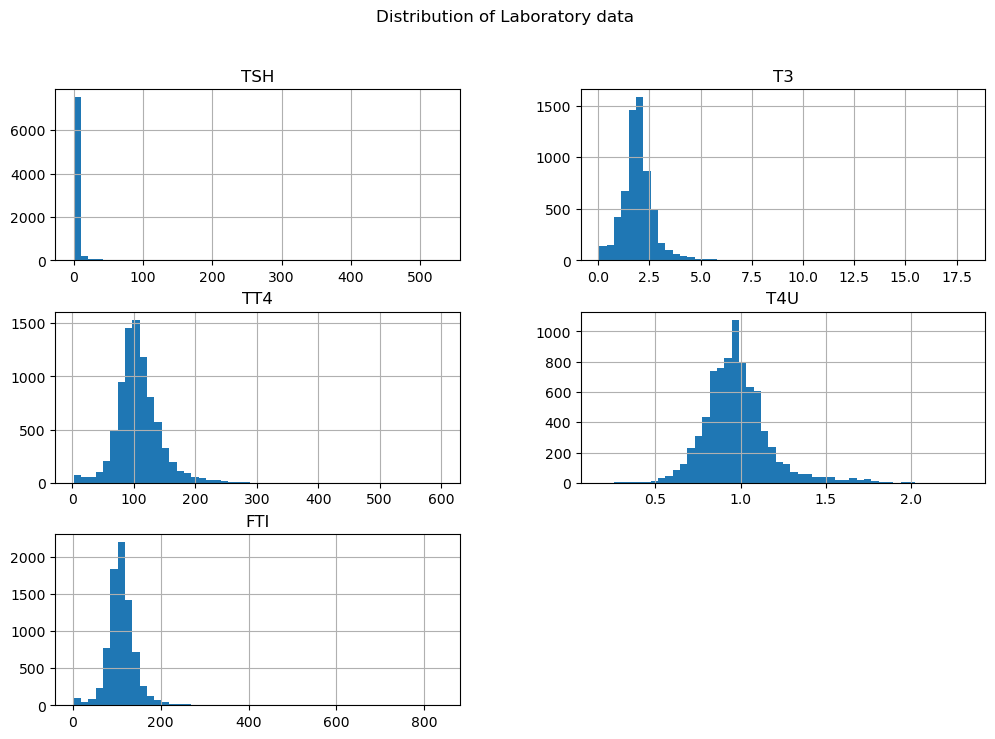

In [79]:
df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']].hist(bins=50, figsize=(12, 8))
plt.suptitle("Distribution of Laboratory data")
plt.show()

It is clear that the dataset has outliers, however, they can count to severe illness cases, and additionally, the erroneus data were manually labelled as 'R' which we removed, therefore, all the outliers will not be removed. 
Nervertheless, since the data in column TSH is highly right-skewed, the log transformation will be performed. 

In [81]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

# Final dataset size after cleaning 

In [83]:
df.shape

(8829, 27)

# Data Split

Splitting the dataset with stratification as the dataset is highly imbalanced. The dataset was splitted into Training + Cross-validation set (85%) and the test set (15%). 

In [86]:
# Step 1: Separating features and target values
X = df.drop('target', axis=1)
y = df['target']

# Step 2: Spliting off the test set (15% of the total data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Output shapes
print(f"Train and validation (Cross-validation): {X_train.shape}, Test: {X_test.shape}")


Train and validation (Cross-validation): (7504, 26), Test: (1325, 26)


The class distribution for each set. 

In [88]:
# For training + validation data (used in cross-validation)
print("Class distribution in Train+Validation (CV set):")
print(y_train.value_counts(normalize=True).sort_index() * 100)  
print()

# For test data
print("Class distribution in Test set:")
print(y_test.value_counts(normalize=True).sort_index() * 100)  


Class distribution in Train+Validation (CV set):
target
Hyperthyroid              2.212154
Hypothyroid               6.809701
Negative                 76.639126
Non-thyroidal Illness    10.154584
Replacement Therapy       3.811301
Treatment Effect          0.373134
Name: proportion, dtype: float64

Class distribution in Test set:
target
Hyperthyroid              2.188679
Hypothyroid               6.792453
Negative                 76.679245
Non-thyroidal Illness    10.188679
Replacement Therapy       3.773585
Treatment Effect          0.377358
Name: proportion, dtype: float64


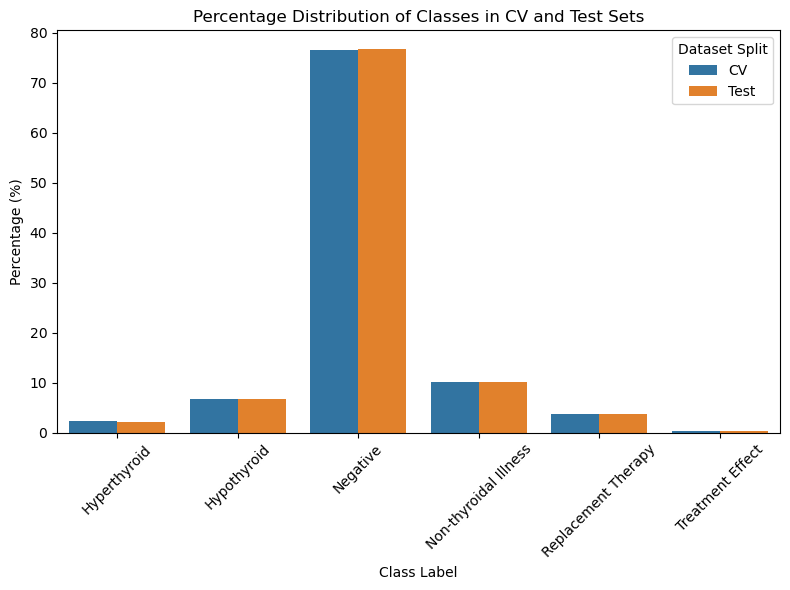

In [89]:
# Compute percentages
train_percent = y_train.value_counts(normalize=True).sort_index() * 100
test_percent = y_test.value_counts(normalize=True).sort_index() * 100

# Combine into a DataFrame for plotting
percent_df = pd.DataFrame({
    'Class': train_percent.index.tolist() + test_percent.index.tolist(),
    'Percentage': list(train_percent.values) + list(test_percent.values),
    'Split': ['CV'] * len(train_percent) + ['Test'] * len(test_percent)
})

plt.figure(figsize=(8, 6))
sns.barplot(data=percent_df, x='Class', y='Percentage', hue='Split')
plt.title('Percentage Distribution of Classes in CV and Test Sets')
plt.ylabel('Percentage (%)')
plt.xlabel('Class Label')
plt.xticks(rotation=45)
plt.legend(title='Dataset Split')
plt.tight_layout()
plt.show()

As shown in the plot, all classes are distrubuted equally through training and testing sets. 

# Data imputing 

Adding data imputation to handle missing values in 'TSH', 'T3', 'TT4', 'T4U', 'FTI' columns. We are adding median values instead missed values. 
The imputation is being added into Train set, then validation and test sets were transformed for consistency.

In [93]:
# Impute missing values for numerical columns (TSH, T3, TT4, T4U, FTI)
num_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data, then transform on test 
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Output the shapes to verify
print(f"Cross validation set: {X_train.shape}, Test: {X_test.shape}")

Cross validation set: (7504, 26), Test: (1325, 26)


In [94]:
# Check for missing values in training and test data
print(f"Missing values in training set: {X_train[num_cols].isnull().sum()}")
print(f"Missing values in test set: {X_test[num_cols].isnull().sum()}")


Missing values in training set: TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64
Missing values in test set: TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64


After data inputation, we have no null values in  both test and train sets. 

In [96]:
# Data transformation 

Applying transformation on right skewed data 

In [98]:
transform_cols = ['TSH']

X_train[transform_cols]= np.log1p(X_train[transform_cols])
X_test[transform_cols] = np.log1p(X_test[transform_cols])

# 4. Check shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (7504, 26), Test shape: (1325, 26)


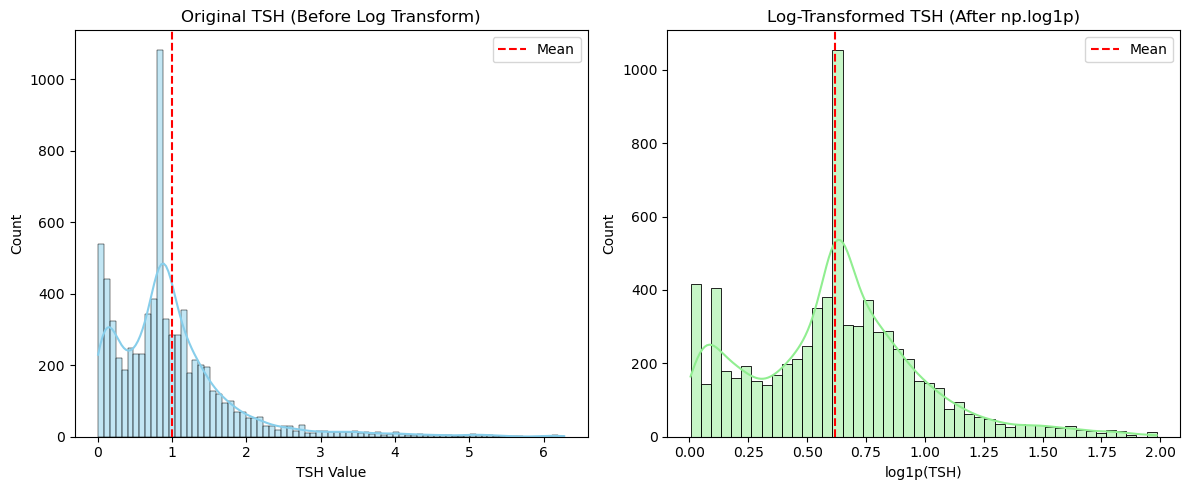

In [99]:
# Sample data 
tsh_before = X_train['TSH'].copy()
tsh_after = np.log1p(X_train['TSH'])

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot BEFORE (original TSH)
sns.histplot(tsh_before, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original TSH (Before Log Transform)')
axes[0].set_xlabel('TSH Value')
axes[0].axvline(tsh_before.mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

# Plot AFTER (log-transformed TSH)
sns.histplot(tsh_after, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Log-Transformed TSH (After np.log1p)')
axes[1].set_xlabel('log1p(TSH)')
axes[1].axvline(tsh_after.mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

# Data encoding 

In [101]:
# Check the unique data types for each column
print(df.dtypes)

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
target                  object
dtype: object


In [102]:
# Check the unique values for each categorical column
for col in df.columns:
    if df[col].dtype == 'object': 
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'sex': ['F' 'M']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_meds': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['t' 'f']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'TSH_measured': ['t' 'f']
Unique values in 'T3_measured': ['f' 't']
Unique values in 'TT4_measured': ['f' 't']
Unique values in 'T4U_measured': ['f' 't']
Unique values in 'FTI_measured': ['f' 't']
Unique values in 'target': ['Negative' 'Non-thyroidal Illness' 'Hypothyroid' 'Replacement Therapy'
 'Hyperthyroid' 'Treatment Effect']


1. Label encoding for binary values in columns 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TT4_measured', 'FTI_measured', 'T3_measured', 'T4U_measured'.
2. Label Encoding for the target variable


In [104]:
# Define LabelEncoder
le = LabelEncoder()

# Binary categorical columns
binary_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
               'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
               'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TT4_measured', 'FTI_measured', 'T3_measured', 'T4U_measured']

# Apply Label Encoding for binary columns
for col in binary_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Ensure consistent column alignment across all sets
X_test_aligned, _ = X_test.align(X_train, join='left', axis=1, fill_value=0)

X_test = X_test_aligned

# Check the shapes after encoding
print(f"Train X shape: {X_train.shape}")
print(f"Test X shape: {X_test.shape}")

# Encode the target variable (y)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Check the shapes after encoding
print(f"Train y shape: {y_train.shape}")
print(f"Test y shape: {y_test.shape}")


Train X shape: (7504, 26)
Test X shape: (1325, 26)
Train y shape: (7504,)
Test y shape: (1325,)


The mapping of the target column 

In [106]:
label_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Hyperthyroid', 1: 'Hypothyroid', 2: 'Negative', 3: 'Non-thyroidal Illness', 4: 'Replacement Therapy', 5: 'Treatment Effect'}


# Data scaling 

Numeric columns in the dataset: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [109]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].describe())

               age          TSH           T3          TT4          T4U  \
count  7504.000000  7504.000000  7504.000000  7504.000000  7504.000000   
mean     52.004398     0.993303     1.962086   107.566205     0.978575   
std      18.789095     0.842376     0.753212    36.060385     0.190790   
min       1.000000     0.004988     0.050000     2.000000     0.170000   
25%      37.000000     0.470004     1.700000    88.000000     0.870000   
50%      55.000000     0.875469     1.900000   104.000000     0.960000   
75%      67.000000     1.252763     2.100000   123.000000     1.060000   
max      97.000000     6.274762    18.000000   600.000000     2.330000   

               FTI  
count  7504.000000  
mean    111.436614  
std      36.045960  
min       1.400000  
25%      95.000000  
50%     108.000000  
75%     124.000000  
max     642.000000  


Scaling is necessary in all columns as they have widely different scales. 

In [111]:
# Create copies before scaling
X_train_before_scaling = X_train.copy()

# Numeric features to scale
scale_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Initializing the scaler
scaler = StandardScaler()

# Fit on training only and transform all
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# Check the shapes after scaling
print(f"Train X shape: {X_train.shape}")
print(f"Test X shape: {X_test.shape}")

print(f"Train y shape: {y_train.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (7504, 26)
Test X shape: (1325, 26)
Train y shape: (7504,)
Test y shape: (1325,)


The values of the numeric columns ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] after scaling

In [113]:
print(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].describe())

                age           TSH            T3           TT4           T4U  \
count  7.504000e+03  7.504000e+03  7.504000e+03  7.504000e+03  7.504000e+03   
mean  -1.259357e-16 -2.021600e-16 -9.563542e-17 -3.380381e-16 -2.698623e-17   
std    1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00   
min   -2.714755e+00 -1.173325e+00 -2.538746e+00 -2.927679e+00 -4.238313e+00   
25%   -7.986227e-01 -6.212598e-01 -3.479805e-01 -5.426317e-01 -5.691167e-01   
50%    1.594437e-01 -1.398929e-01 -8.243325e-02 -9.890195e-02 -9.736280e-02   
75%    7.981545e-01  3.080296e-01  1.831140e-01  4.280271e-01  4.268082e-01   
max    2.394932e+00  6.270131e+00  2.129412e+01  1.365672e+01  7.083779e+00   

                FTI  
count  7.504000e+03  
mean  -1.372984e-16  
std    1.000067e+00  
min   -3.052879e+00  
25%   -4.560208e-01  
50%   -9.534613e-02  
75%    3.485612e-01  
max    1.472006e+01  


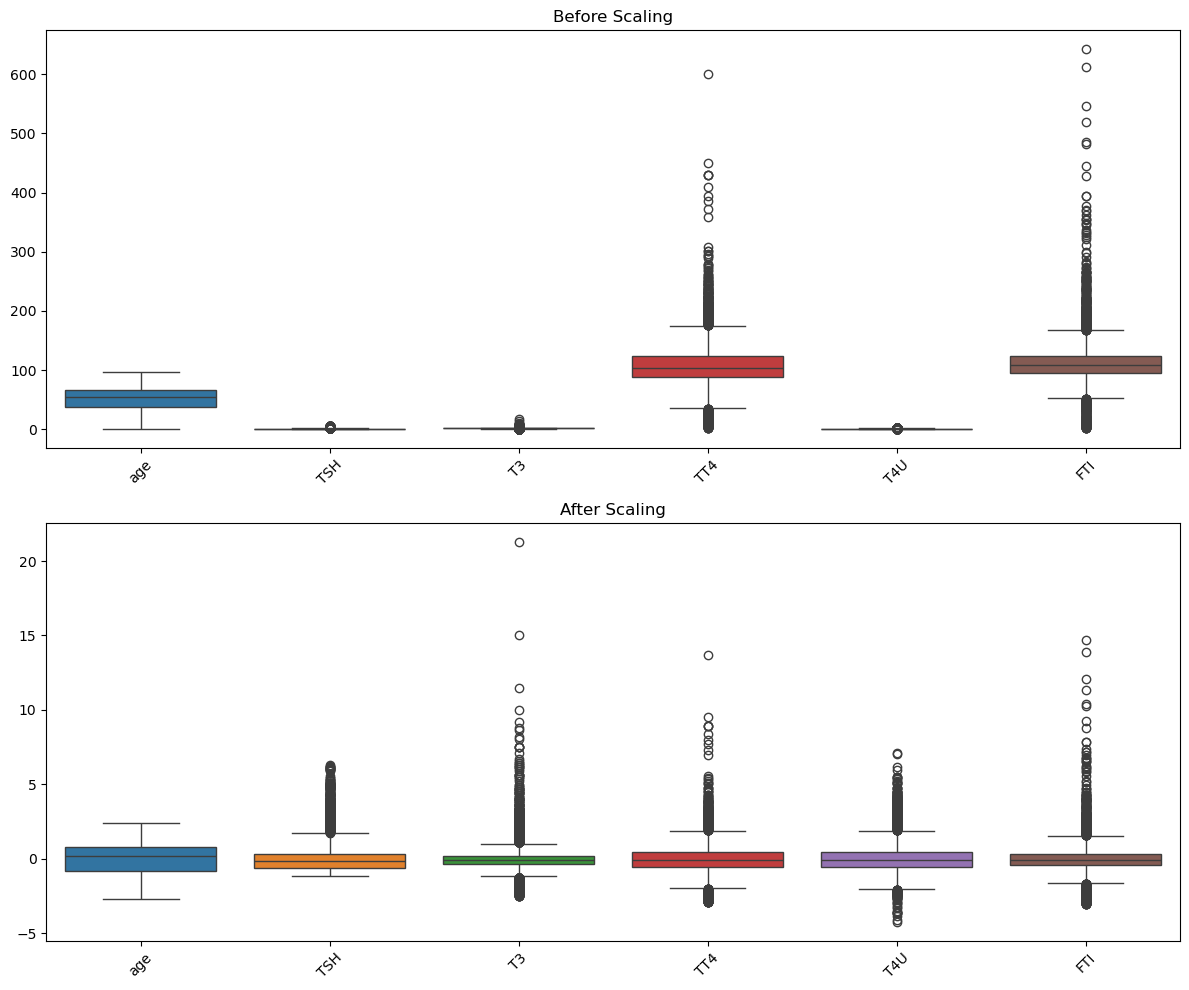

In [114]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot before scaling
sns.boxplot(data=X_train_before_scaling[scale_cols], ax=axes[0])
axes[0].set_title("Before Scaling")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after scaling
sns.boxplot(data=X_train[scale_cols], ax=axes[1])
axes[1].set_title("After Scaling")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Plotting the class distribution of the target value in the train data set and showing the class distribution in percent. 

Class distribution (%):
2    76.64
3    10.15
1     6.81
4     3.81
0     2.21
5     0.37
Name: proportion, dtype: float64


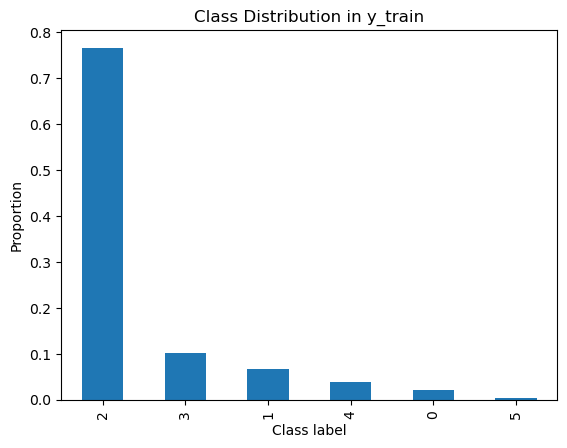

In [116]:
class_counts = pd.Series(y_train).value_counts(normalize=True)

print("Class distribution (%):")
print((class_counts * 100).round(2))

class_counts.plot(kind='bar', title='Class Distribution in y_train')
plt.ylabel('Proportion')
plt.xlabel('Class label')
plt.show()


The data is highly imbalanced as the classes 5, 0, 4  are underrepresented in target column compared to class 3 ('Negative'). Such imbalances are common in medical datasets as the number of healthy patient usually larger than the number of disease cases. 
The class imbalance is solved by: 

1. Tunning the hyperparameters of models. 
2. Resampling using SMOTE (upsampling underrepresented classes).

# Metrics 

Since the imbalance of the dataset the primary metrics used for the models performance evaluation are:
1. Macro F1 score 
2. Precision, recall metrics for each class 
3. Confusion matrix
4. Balanced accuracy 

# Baseline models 

As a baseline 10 models were chosen: 
1. Logistic Regression
2. Random Forest 
3. XGBoost
4. LightGBM
5. CatBoost
6. Gradient Boosting
7. Decision Tree
8. K-Nearest Neighbors
9. Gaussian Naive Bayes 
10. Support Vector Machine

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [123]:
models = {}

# 1. Logistic Regression
models['Logistic Regression'] = LogisticRegression(
    max_iter=5000, class_weight='balanced', random_state=42)

# 2. Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42)

# 3. XGBoost
models['XGBoost'] = xgb.XGBClassifier(
   eval_metric='mlogloss', random_state=42)

# 4. LightGBM
models['LightGBM'] = lgb.LGBMClassifier(
    class_weight='balanced', random_state=42)

# 5. CatBoost
models['CatBoost'] = CatBoostClassifier(
    verbose=0, random_state=42, auto_class_weights='Balanced')

# 6. Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(
    random_state=42)

# 7. Decision Tree
models['Decision Tree'] = DecisionTreeClassifier(
    class_weight='balanced', random_state=42)

# 8. K-Nearest Neighbors
models['KNN'] = KNeighborsClassifier()

# 9. Gaussian Naive Bayes
models['Naive Bayes'] = GaussianNB()

# 10. Support Vector Machine
models['SVM'] = SVC(
    class_weight='balanced', probability=True, random_state=42)



Evaluating Model: Logistic Regression


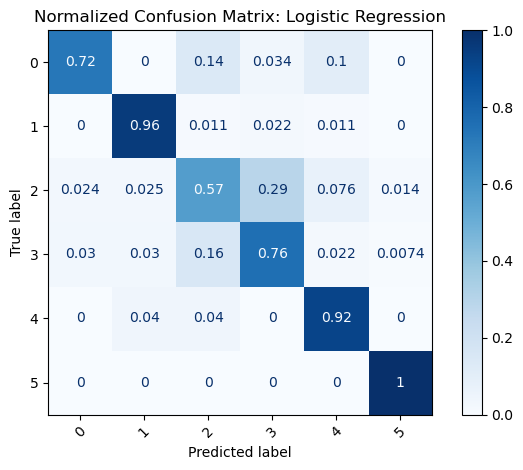


Evaluating Model: Random Forest


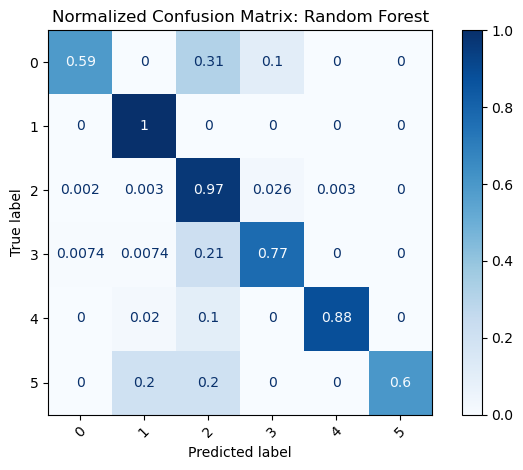


Evaluating Model: XGBoost


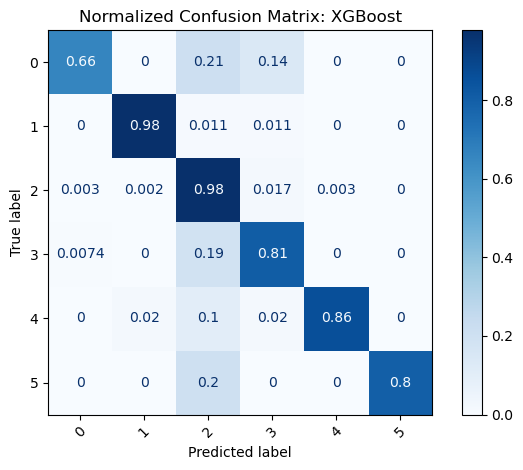


Evaluating Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 7504, number of used features: 25
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

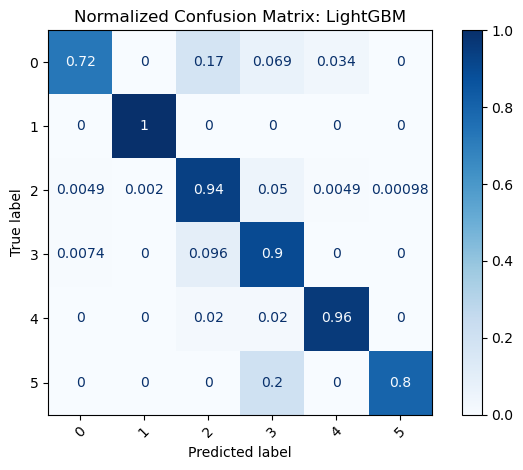


Evaluating Model: CatBoost


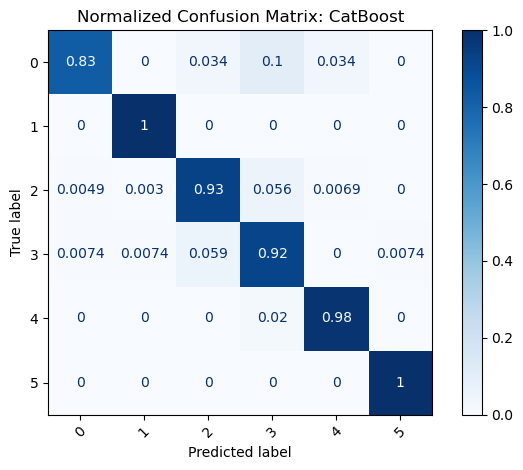


Evaluating Model: Gradient Boosting


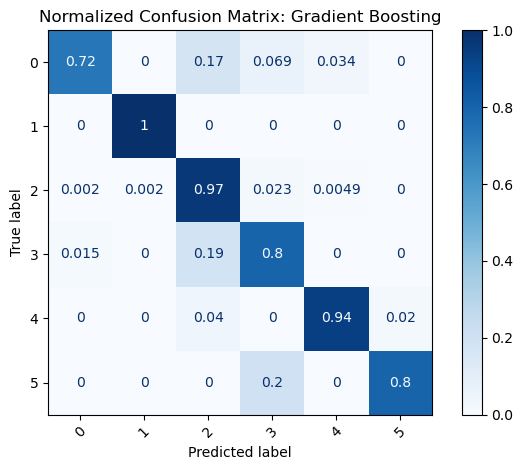


Evaluating Model: Decision Tree


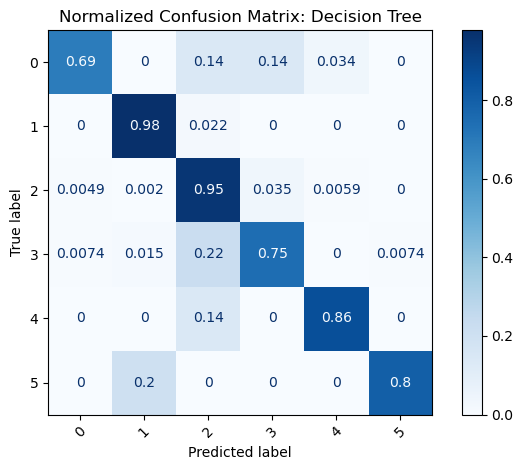


Evaluating Model: KNN


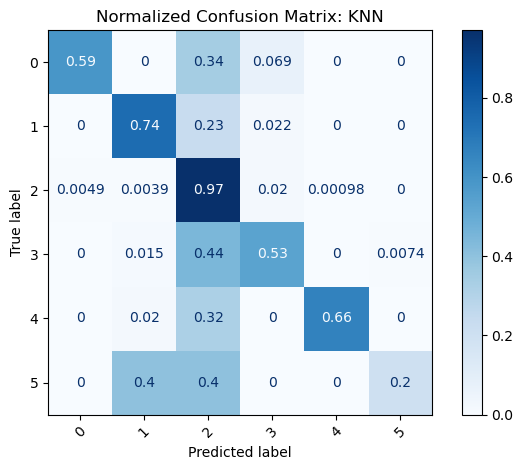


Evaluating Model: Naive Bayes


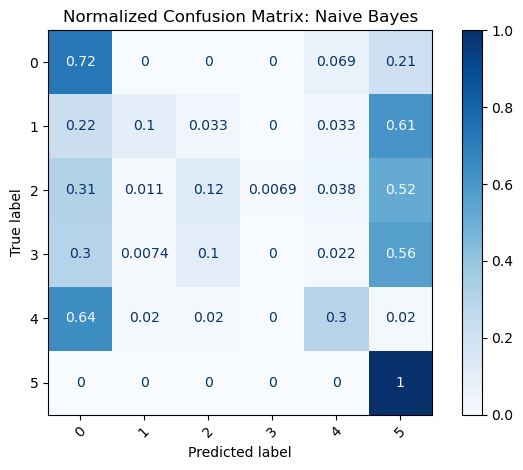


Evaluating Model: SVM


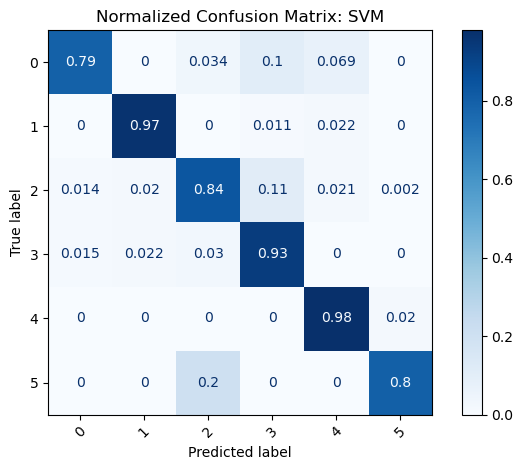


Model Comparison Table (Sorted by Macro F1 & Balanced Accuracy):
              Model  Balanced Accuracy  Macro F1  Macro Precision  Macro Recall  AUC-PR (micro)
           CatBoost           0.942540  0.891777         0.851876      0.942540        0.984423
            XGBoost           0.845959  0.878923         0.919455      0.845959        0.990072
  Gradient Boosting           0.872107  0.875148         0.879921      0.872107        0.989465
           LightGBM           0.886240  0.866409         0.852143      0.886240        0.987847
      Random Forest           0.800519  0.842793         0.910457      0.800519        0.987770
      Decision Tree           0.837892  0.839249         0.841534      0.837892        0.870708
                SVM           0.884789  0.763833         0.688704      0.884789        0.970943
                KNN           0.615743  0.683809         0.795892      0.615743        0.923546
Logistic Regression           0.821183  0.562813         0.496081     

In [124]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score
)
from sklearn.multiclass import OneVsRestClassifier

# Store results here
results = []

# Ensure y_test is a Series for compatibility
y_test_series = pd.Series(y_test)

# Binarize labels for AUC-PR calculation
classes = np.unique(y_test_series)
y_test_bin = label_binarize(y_test_series, classes=classes)

# Loop through your models
for name, model in models.items():
    print(f"\nEvaluating Model: {name}")

    # Wrap model in OneVsRestClassifier if no predict_proba
    use_proba = hasattr(model, "predict_proba")
    model_bin = model if use_proba else OneVsRestClassifier(model)

    # Fit model
    model_bin.fit(X_train, y_train)

    # Predict labels
    y_pred = model_bin.predict(X_test)

    # Predict probabilities for AUC-PR
    if hasattr(model_bin, "predict_proba"):
        y_score = model_bin.predict_proba(X_test)
        try:
            auc_pr = average_precision_score(y_test_bin, y_score, average='micro')
        except ValueError:
            auc_pr = None  # Handle case where AUC-PR cannot be calculated
    else:
        auc_pr = None

    # Compute performance metrics
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')

    # Append to results
    results.append({
        'Model': name,
        'Balanced Accuracy': bal_acc,
        'Macro F1': f1_macro,
        'Macro Precision': precision_macro,
        'Macro Recall': recall_macro,
        'AUC-PR (micro)': auc_pr
    })

    # Confusion Matrix Display
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Normalized Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['Macro F1', 'Balanced Accuracy'], ascending=[False, False])

# Display sorted results
print("\nModel Comparison Table (Sorted by Macro F1 & Balanced Accuracy):")
print(results_df.to_string(index=False))


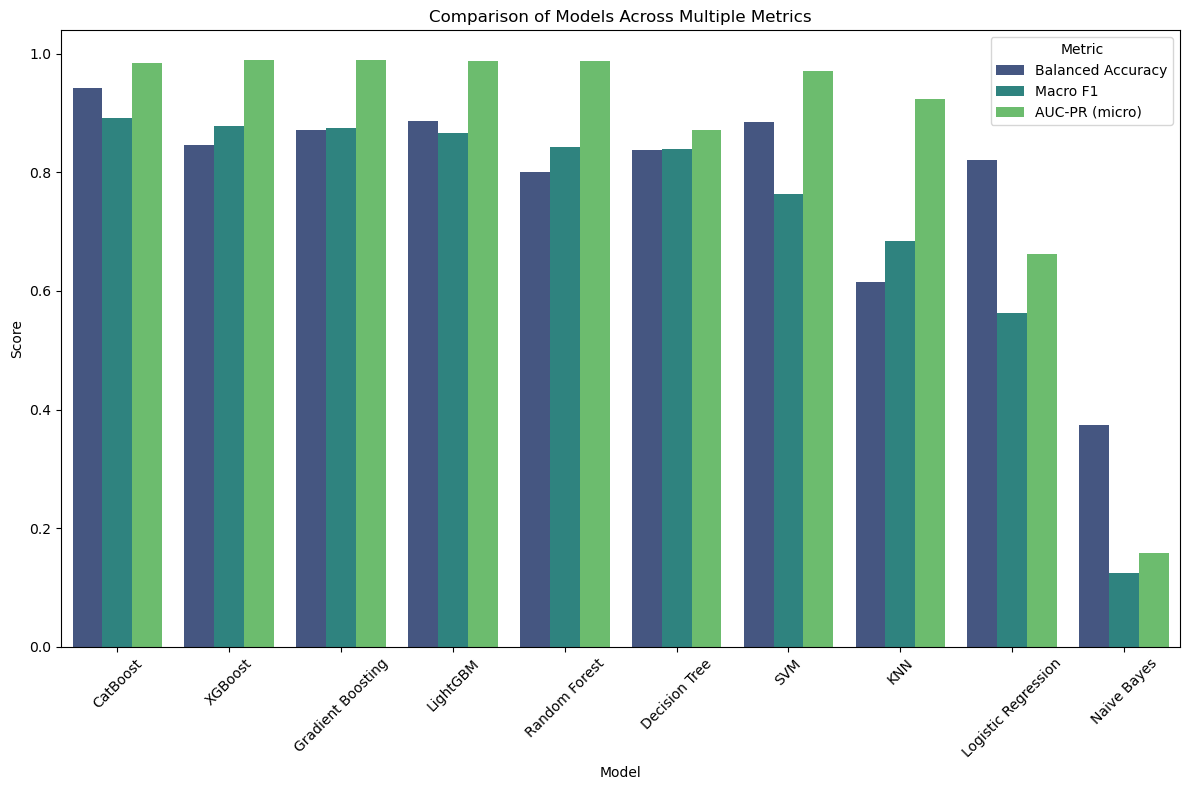

In [125]:
# Melt the DataFrame to long format for grouped bar plot
metrics_columns = ['Balanced Accuracy', 'Macro F1', 'AUC-PR (micro)']
results_df_melted = results_df.melt(id_vars='Model', value_vars=metrics_columns, 
                                    var_name='Metric', value_name='Score')

# Grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted, palette='viridis')
plt.title('Comparison of Models Across Multiple Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the baseline models performace metrics, the models with 80%+ F-1 macro mertic are: 
1. CatBoost
2. XGBoost
3. Gradient Boosting
4. LightGBM
5. Random Forest
6. Decision tree
7. SVM

Interpreteation of the baseline models and model selection. 

Plotting feature importance for each model with high mertics 

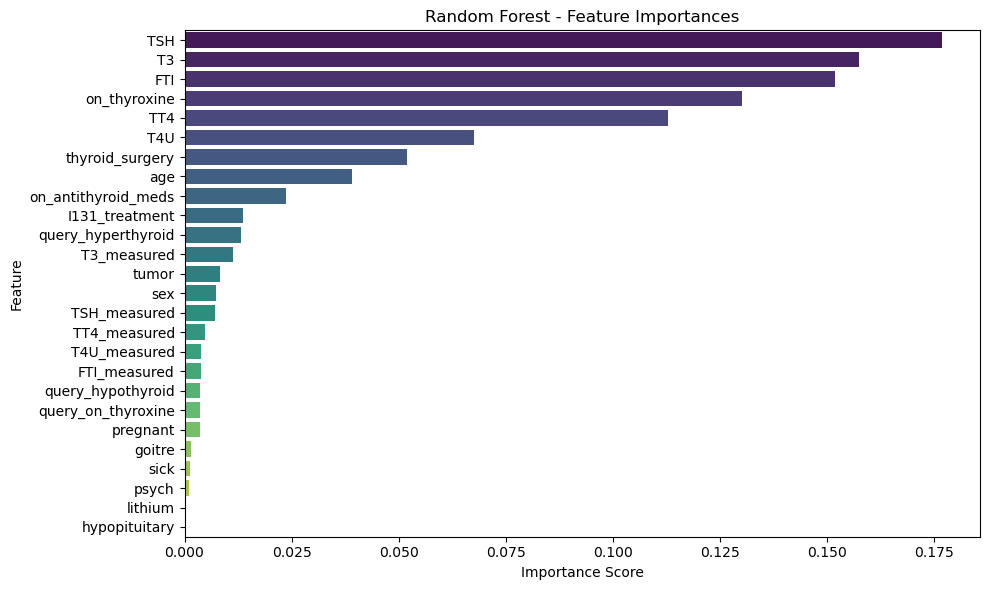

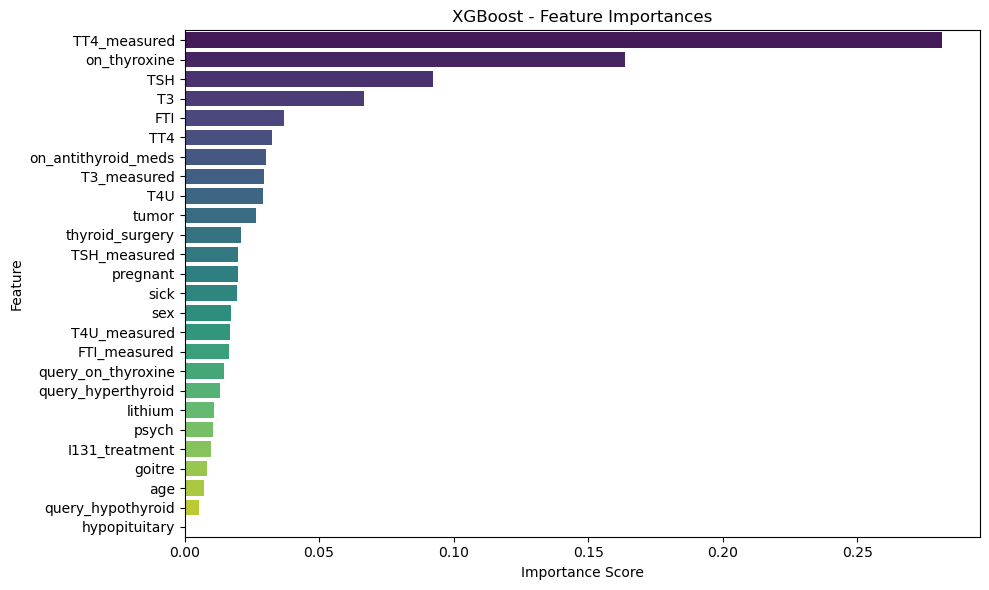

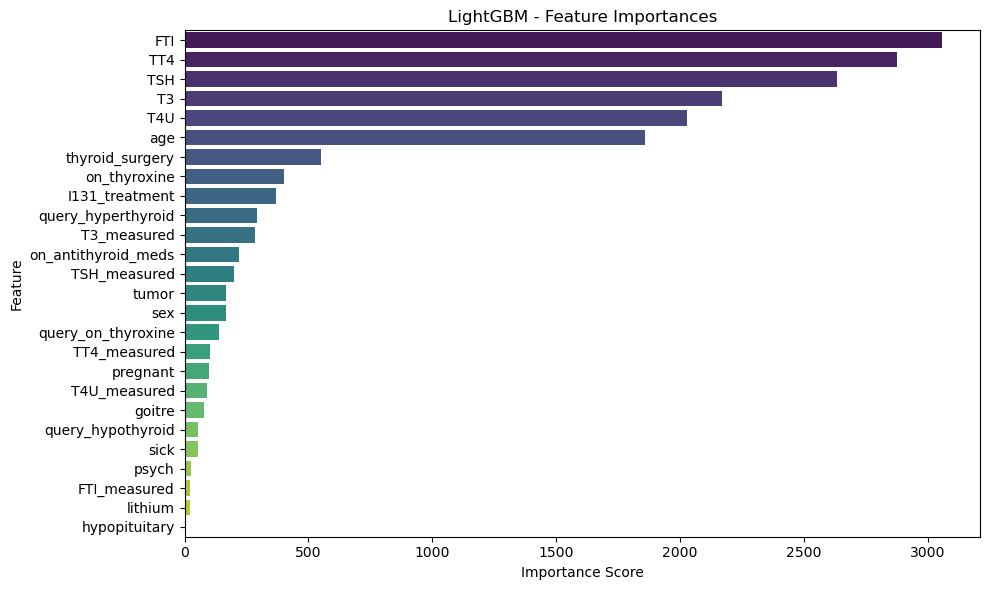

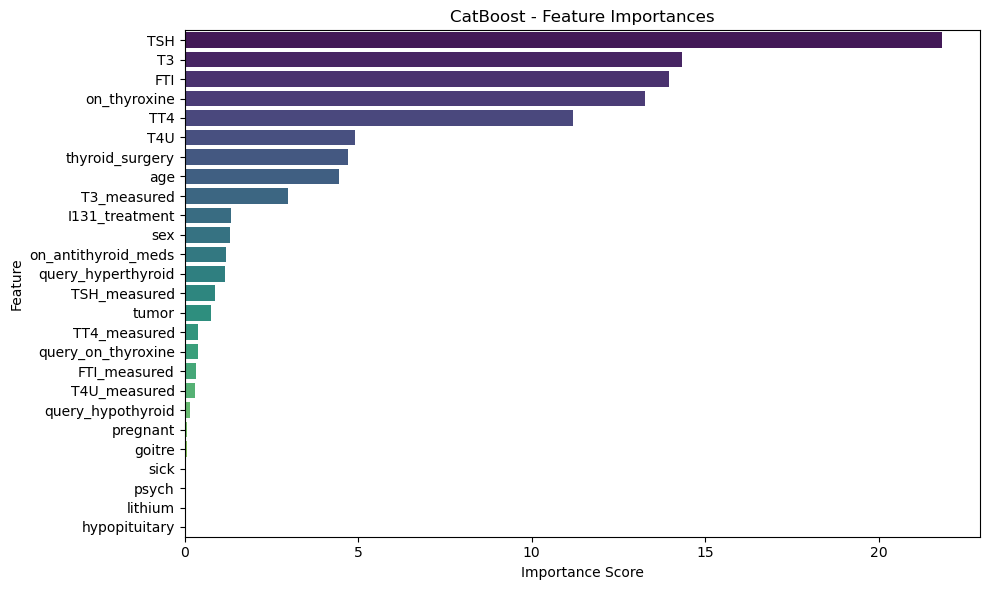

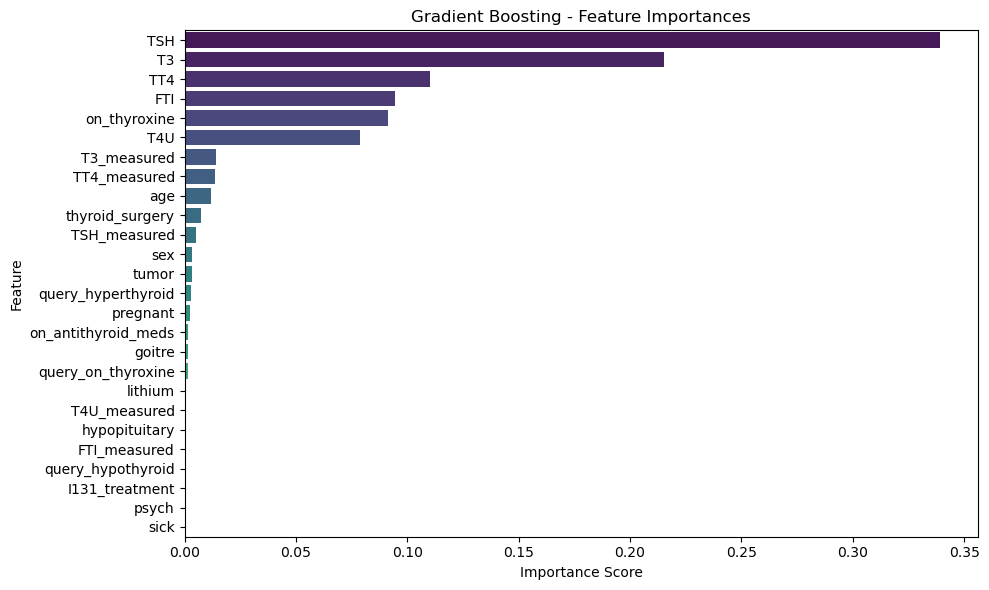

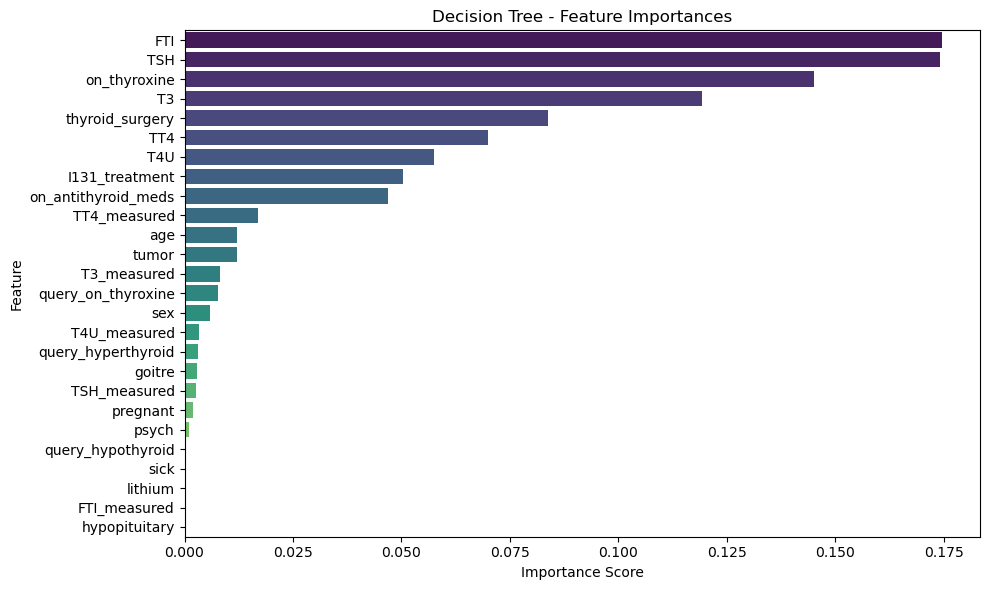

Skipping SVM: No feature importance or coefficients found.


In [129]:
selected_model_names = ["XGBoost", "CatBoost", "LightGBM", "Gradient Boosting", "Random Forest", "Decision Tree", "SVM"]

for name, model in models.items():
    if name not in selected_model_names:
        continue 
    try:
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            title = "Feature Importances"
        
        elif hasattr(model, "coef_"):
            coef = model.coef_
            
            # Handle multiclass: average absolute coefficients across classes
            if coef.ndim > 1:
                importances = np.mean(np.abs(coef), axis=0)
            else:
                importances = np.abs(coef)
            title = "Feature Coefficients (|mean|)"
        
        else:
            print(f"Skipping {name}: No feature importance or coefficients found.")
            continue

        # Create DataFrame
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(
        data=importance_df,
        y='Feature',
        x='Importance',
        hue='Feature',
        dodge=False,
        legend=False,
        palette='viridis'
        )

        plt.title(f"{name} - {title}")
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not plot feature importance for {name}: {e}")


Based on the analysis, we see 

# Data Modelling

Model evaluation mertics and confusion matrix 

In [133]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Macro F1-Score
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Macro F1-Score: {macro_f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Normalized Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    return {
        "Balanced Accuracy": balanced_acc,
        "Macro F1-Score": macro_f1
    }


## Random Forest Classifier

In [135]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


In [136]:
# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Feature selector using Random Forest feature importances
feature_selector = SelectFromModel(rf, threshold=0.002)  # keep features with importance > 0.002

# Pipeline: feature selection + Random Forest
pipeline = Pipeline([
    ('feature_selection', feature_selector),
    ('random_forest', rf)
])

# Define param grid for the Random Forest 
param_dist = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],          
    'random_forest__max_features': ['sqrt', 'log2', 0.5],
    'random_forest__class_weight': ['balanced']
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV for pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,            
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)
# Fit randomized search on train data
random_search.fit(X_train, y_train)

# Best pipeline
best_pipeline = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 2, 'random_forest__max_features': 0.5, 'random_forest__max_depth': None, 'random_forest__class_weight': 'balanced'}
Best Cross-Validated f1_macro: 0.851135570092809


Best Parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 2, 'random_forest__max_features': 0.5, 'random_forest__max_depth': None, 'random_forest__class_weight': 'balanced'}

Then, we chose the parameters that lies closer to the best one. 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Final Best Parameters (RandomizedSearchCV): {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 3, 'random_forest__max_features': 0.6, 'random_forest__max_depth': None, 'random_forest__class_weight': 'balanced'}
Final Best CV Score (f1_macro): 0.8372908191136534

Classification Report for Refined Random Forest (Random Search):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.98      1.00      0.99        90
           2       0.99      0.93      0.96      1016
           3       0.69      0.94      0.79       135
           4       0.83      0.96      0.89        50
           5       0.83      1.00      0.91         5

    accuracy                           0.94      1325
   macro avg       0.85      0.95      0.90      1325
weighted avg       0.95      0.94      0.94      1325

Balance

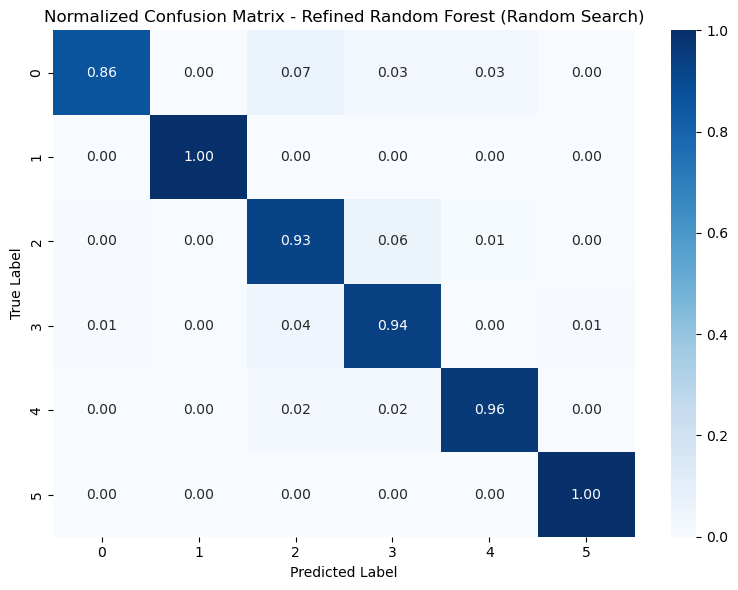

{'Balanced Accuracy': 0.948657260754283, 'Macro F1-Score': 0.895489414501286}

In [140]:
# Use the same refined parameter distribution
refined_param_dist = {
    'random_forest__n_estimators': [100, 150, 200],
    'random_forest__min_samples_split': [2, 3, 4],
    'random_forest__min_samples_leaf': [1, 2, 3],
    'random_forest__max_features': [0.4, 0.5, 0.6],
    'random_forest__max_depth': [None, 20, 30, 40],
    'random_forest__class_weight': ['balanced', 'balanced_subsample']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=refined_param_dist,
    n_iter=20, 
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit with refined random search
random_search.fit(X_train, y_train)

# Results
print(" Best Parameters:", random_search.best_params_)
print("Best CV Score (f1_macro):", random_search.best_score_)


In [142]:
refined_param_dist_v2 = {
    'random_forest__n_estimators': [100, 120, 150],
    'random_forest__min_samples_split': [2, 3],
    'random_forest__min_samples_leaf': [2, 3, 4],
    'random_forest__max_features': [0.5, 0.6, 0.7],
    'random_forest__max_depth': [None, 25, 30, 35],
    'random_forest__class_weight': ['balanced']  # remove 'balanced_subsample' since 'balanced' performed better
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=refined_param_dist,
    n_iter=20,  
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit with refined random search
random_search.fit(X_train, y_train)

# Results
print(" Best Parameters:", random_search.best_params_)
print("Best CV Score (f1_macro):", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 3, 'random_forest__max_features': 0.6, 'random_forest__max_depth': None, 'random_forest__class_weight': 'balanced'}
Best CV Score (f1_macro): 0.8372908191136534


In [146]:
refined_param_dist_v3 = {
    'random_forest__n_estimators': [50, 75, 100], 
    'random_forest__min_samples_split': [2, 3],
    'random_forest__min_samples_leaf': [2, 3, 4],
    'random_forest__max_features': [0.5, 0.6, 0.7],
    'random_forest__max_depth': [None, 10, 15, 20],
    'random_forest__class_weight': ['balanced'] 
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=refined_param_dist,
    n_iter=20,  
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit with refined random search
random_search.fit(X_train, y_train)

# Results
print(" Best Parameters:", random_search.best_params_)
print("Best CV Score (f1_macro):", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 3, 'random_forest__max_features': 0.6, 'random_forest__max_depth': None, 'random_forest__class_weight': 'balanced'}
Best CV Score (f1_macro): 0.8372908191136534


Since the metrics of the prediction on train set is not improving, we try test.


Classification Report for Random Forest with Feature Selection (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.98      1.00      0.99        90
           2       0.98      0.94      0.96      1016
           3       0.70      0.88      0.78       135
           4       0.86      0.96      0.91        50
           5       0.83      1.00      0.91         5

    accuracy                           0.94      1325
   macro avg       0.87      0.93      0.89      1325
weighted avg       0.94      0.94      0.94      1325

Balanced Accuracy: 0.9293
Macro F1-Score: 0.8944


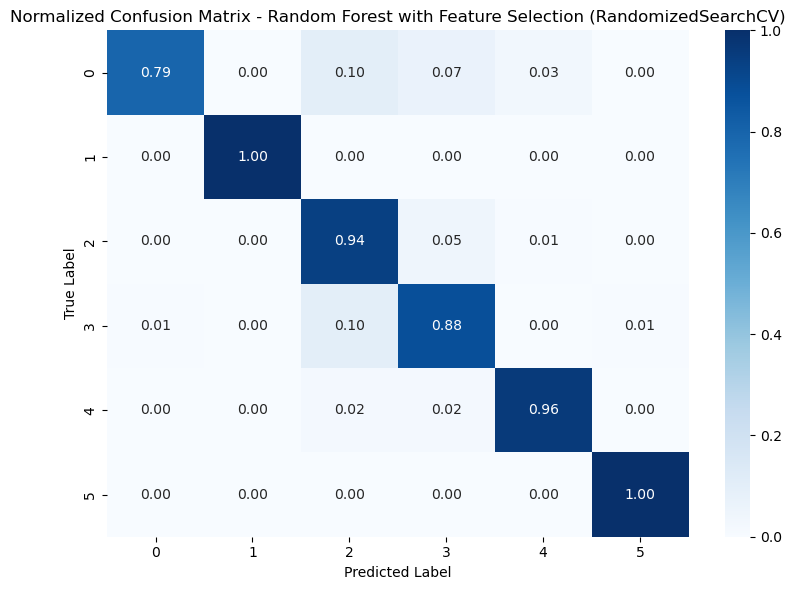

{'Balanced Accuracy': 0.9292549686078512, 'Macro F1-Score': 0.8943871226403203}

In [148]:
# Predict on test
y_pred_test = best_pipeline.predict(X_test)

# Evaluate using your custom evaluate_model function
evaluate_model(y_test, y_pred_test, model_name="Random Forest with Feature Selection")

Selected features for the Random Forest model.

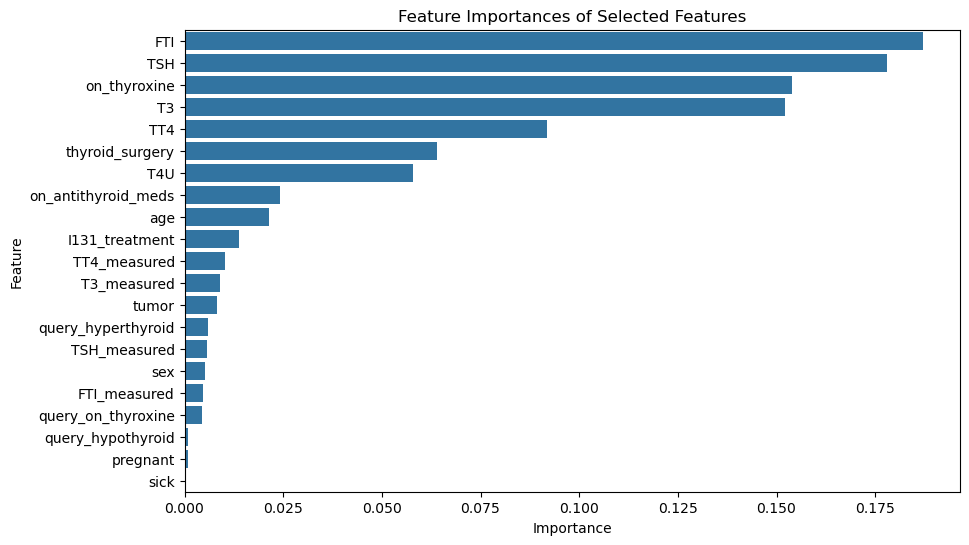

In [150]:
# Get mask of selected features
selected_mask = best_pipeline.named_steps['feature_selection'].get_support()

# Selected feature names
selected_features = X_train.columns[selected_mask]

# Get feature importances from the trained Random Forest in pipeline
importances = best_pipeline.named_steps['random_forest'].feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = selected_features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Feature Importances of Selected Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## XGBoost Classifier

In [156]:
# Initialize base XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup without pipeline
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    refit=True
)

# Fit model
grid_search.fit(X_train, y_train)

# Best estimator and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


KeyboardInterrupt: 

In [161]:
# Parameter distribution for RandomizedSearchCV 
param_dist_v2 = {
    'n_estimators': [150, 200, 250],
    'max_depth': [8, 10, 12],
    'learning_rate': [0.005, 0.01, 0.02],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.9, 1.0],
    'gamma': [0, 0.05, 0.1],
    'reg_alpha': [0, 0.05, 0.1],
    'reg_lambda': [0, 0.05, 0.1]
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_v2,
    n_iter=30,               # number of parameter settings sampled
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.05, 'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0.05, 'colsample_bytree': 1.0}
Best Cross-Validated f1_macro: 0.8328108105370939


In [171]:
# Parameter distribution for RandomizedSearchCV 
param_dist_v3 = {
    'n_estimators': [240, 250, 260],            # zoom around 250
    'max_depth': [11, 12, 13],                  # zoom around 12
    'learning_rate': [0.009, 0.01, 0.011],      # tight around 0.01
    'subsample': [0.78, 0.8, 0.82],             # tighter zoom around 0.8
    'colsample_bytree': [0.95, 1.0],            # fixed at top end
    'gamma': [0.04, 0.05, 0.06],                # zoom around 0.05
    'reg_alpha': [0.04, 0.05, 0.06],            # zoom around 0.05
    'reg_lambda': [0, 0.05, 0.1]
}


# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_v2,
    n_iter=30,              
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.75, 'reg_lambda': 0, 'reg_alpha': 0.05, 'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.015, 'gamma': 0.05, 'colsample_bytree': 1.0}
Best Cross-Validated f1_macro: 0.8384939220077499


In [173]:
# Parameter distribution for RandomizedSearchCV 
param_dist_v4 = {
    'n_estimators': [240, 250, 260],
    'max_depth': [14, 15, 16],                   # zoom around 15
    'learning_rate': [0.013, 0.015, 0.017],      # tighter around 0.015
    'subsample': [0.73, 0.75, 0.77],             # tighter around 0.75
    'colsample_bytree': [0.98, 1.0],             # already optimal
    'gamma': [0.045, 0.05, 0.055],               # slight zoom
    'reg_alpha': [0.045, 0.05, 0.055],           # slight zoom
    'reg_lambda': [0]                            # fixed at best
}

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_v2,
    n_iter=30,              
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.75, 'reg_lambda': 0, 'reg_alpha': 0.05, 'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.015, 'gamma': 0.05, 'colsample_bytree': 1.0}
Best Cross-Validated f1_macro: 0.8384939220077499


There is no further increase in the metrics, so we will predic on the test data.


Classification Report for XGBoost with Feature Selection:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.95      0.98      0.96        90
           2       0.96      0.98      0.97      1016
           3       0.85      0.79      0.82       135
           4       0.92      0.92      0.92        50
           5       1.00      1.00      1.00         5

    accuracy                           0.95      1325
   macro avg       0.93      0.90      0.91      1325
weighted avg       0.95      0.95      0.95      1325

Balanced Accuracy: 0.9028
Macro F1-Score: 0.9141


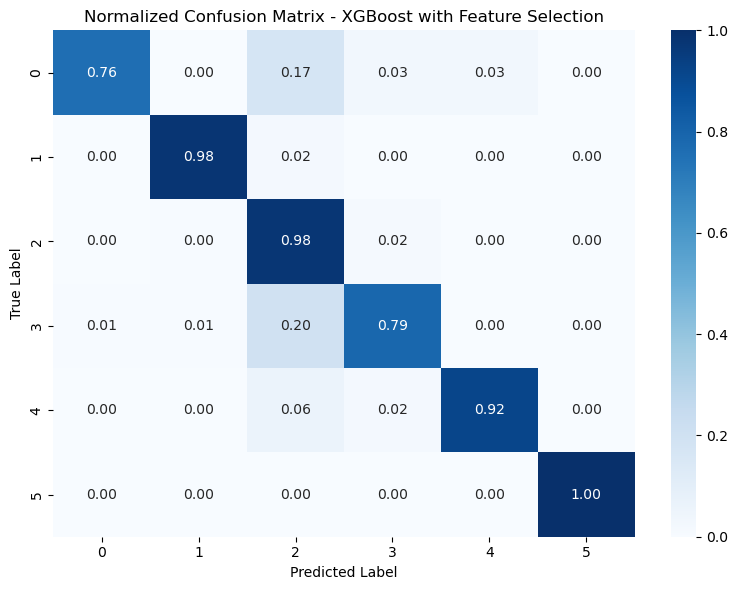

{'Balanced Accuracy': 0.9028295589009229, 'Macro F1-Score': 0.9141272643683004}

In [175]:
# Predict on test set
y_pred_test = best_pipeline.predict(X_test)

# Evaluate model
evaluate_model(y_test, y_pred_test, model_name="XGBoost")


## LightGBM


In [185]:
# Initialize LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Parameter distribution 
param_dist_lgbm = {
    'num_leaves': [75, 100, 150],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [150, 200, 250],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha':  [0.0, 0.01, 0.05],
    'reg_lambda': [0.0, 0.01, 0.05],
    'min_child_samples': [5, 10, 20]
}

# RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search_lgbm.fit(X_train, y_train)

# Best estimator
best_model = random_search_lgbm.best_estimator_

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 6003, number of used features: 25
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [193]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Print best params and score
print("Best Parameters for LightGBM:", random_search_lgbm.best_params_)
print("Best Cross-Validated f1_macro:", random_search_lgbm.best_score_)

# Evaluate model (your custom function)
evaluate_model(y_test, y_pred, model_name="LightGBM ")

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

# CatBoost 

In [195]:
# Initialize base CatBoost model
base_catboost = CatBoostClassifier(
    loss_function='MultiClass',
    thread_count=-1,
    verbose=0,
    random_state=42
)

# Parameter grid (no pipeline prefix)
param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10, 15],
    'border_count': [32, 50, 100],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [0, 0.1, 1],
    'max_ctr_complexity': [1, 2, 3]
}

# RandomizedSearchCV for CatBoost
random_search = RandomizedSearchCV(
    estimator=base_catboost,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    scoring='f1_macro'
)

# Fit model
random_search.fit(X_train, y_train)

# Print best params
print("Best parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'random_strength': 1, 'max_ctr_complexity': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6, 'border_count': 100, 'bagging_temperature': 0.5}


In [199]:
# Parameter grid (no pipeline prefix)
param_dist = {
    'iterations': [300, 500, 800],
    'learning_rate': [0.075, 0.1, 0.15],
    'depth': [5, 6, 7],
    'l2_leaf_reg': [1, 3, 5, 10, 15],
    'border_count': [80, 100, 150],
    'bagging_temperature': [0.25, 0.5, 0.75],
    'random_strength': [0.5, 1 , 2],
    'max_ctr_complexity': [1, 2, 3]
}

# RandomizedSearchCV for CatBoost
random_search = RandomizedSearchCV(
    estimator=base_catboost,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    scoring='f1_macro'
)

# Fit model
random_search.fit(X_train, y_train)

# Print best params
print("Best parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_strength': 0.5, 'max_ctr_complexity': 2, 'learning_rate': 0.075, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 5, 'border_count': 150, 'bagging_temperature': 0.25}
Best Cross-Validated f1_macro: 0.8416232059843818



Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.98      0.97      0.97        90
           2       0.96      0.97      0.96      1016
           3       0.80      0.80      0.80       135
           4       0.88      0.86      0.87        50
           5       0.83      1.00      0.91         5

    accuracy                           0.94      1325
   macro avg       0.87      0.89      0.88      1325
weighted avg       0.94      0.94      0.94      1325

Balanced Accuracy: 0.8861
Macro F1-Score: 0.8773


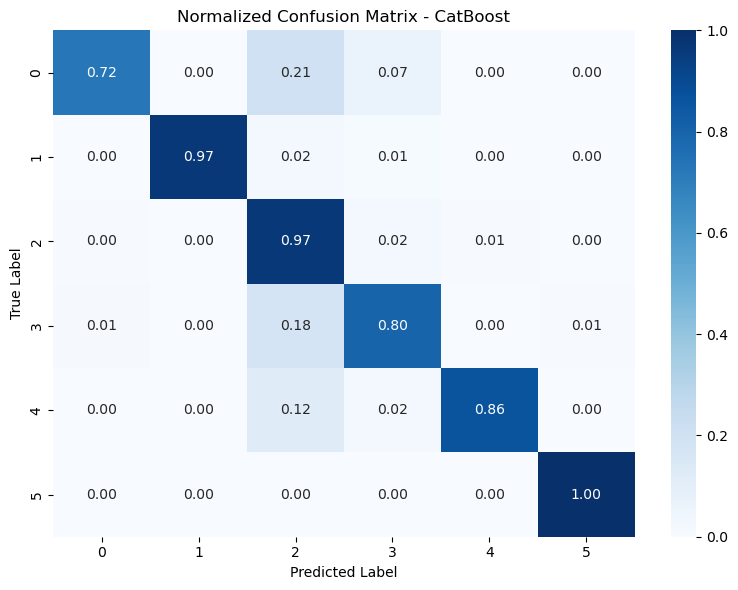

{'Balanced Accuracy': 0.886059296467252, 'Macro F1-Score': 0.8773287635019478}

In [203]:
# Predict on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred, model_name="CatBoost")

# Decision tree 

In [250]:
# Initialize base Decision Tree
base_dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter space for tuning
param_distributions = {
    'max_depth': [10, 20, 50] ,
    'min_samples_split': [5, 10, 15], 
    'min_samples_leaf': [2, 6, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],  
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'class_weight': ['balanced', None]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=base_dt,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Cross-Validated f1_macro: 0.7974601009714668


In [246]:
# Hyperparameter space for tuning
param_distributions = {
    'max_depth': [50, 100, 150] ,
    'min_samples_split': [10, 15, 20], 
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],  
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'class_weight': ['balanced', None]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=base_dt,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 150, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Cross-Validated f1_macro: 0.8078628593345556


In [215]:
# Hyperparameter space for tuning
param_distributions = {
    'max_depth': [120, 150, 180] ,
    'min_samples_split': [12, 15, 18], 
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 0.5, 0.7],  
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'class_weight': ['balanced']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=base_dt,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 120, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Cross-Validated f1_macro: 0.8205741629669824


In [252]:
# Hyperparameter space for tuning
param_distributions = {
    'max_depth': [85, 90, 95] ,
    'min_samples_split': [15], 
    'min_samples_leaf': [1],
    'max_features': [None, 0.2, 0.5],  
    'criterion': ['entropy'], 
    'class_weight': ['balanced']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=base_dt,
    param_distributions=param_distributions,
    n_iter=9,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 85, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Cross-Validated f1_macro: 0.8205741629669824


There is no further improvement, so we predict on the test data. 


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        29
           1       0.91      0.98      0.94        90
           2       0.98      0.93      0.96      1016
           3       0.73      0.87      0.79       135
           4       0.81      0.94      0.87        50
           5       0.67      0.80      0.73         5

    accuracy                           0.93      1325
   macro avg       0.79      0.89      0.83      1325
weighted avg       0.93      0.93      0.93      1325

Balanced Accuracy: 0.8851
Macro F1-Score: 0.8309


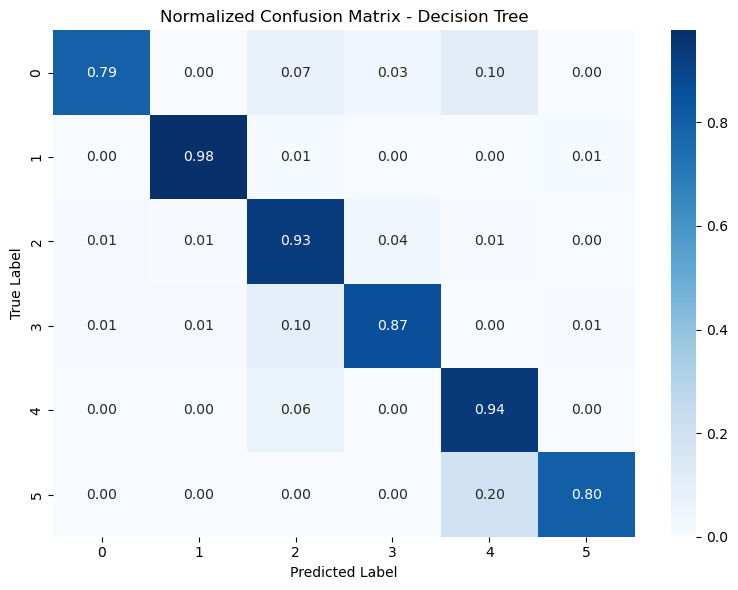

{'Balanced Accuracy': 0.8851031264770065, 'Macro F1-Score': 0.8308561140609374}

In [254]:
# Predict on test data
best_dt = random_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred, model_name="Decision Tree")


/var/folders/gq/xrh_1b4j6j51ct6yfsrj29p80000gn/T/ipykernel_9475/3183460622.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")


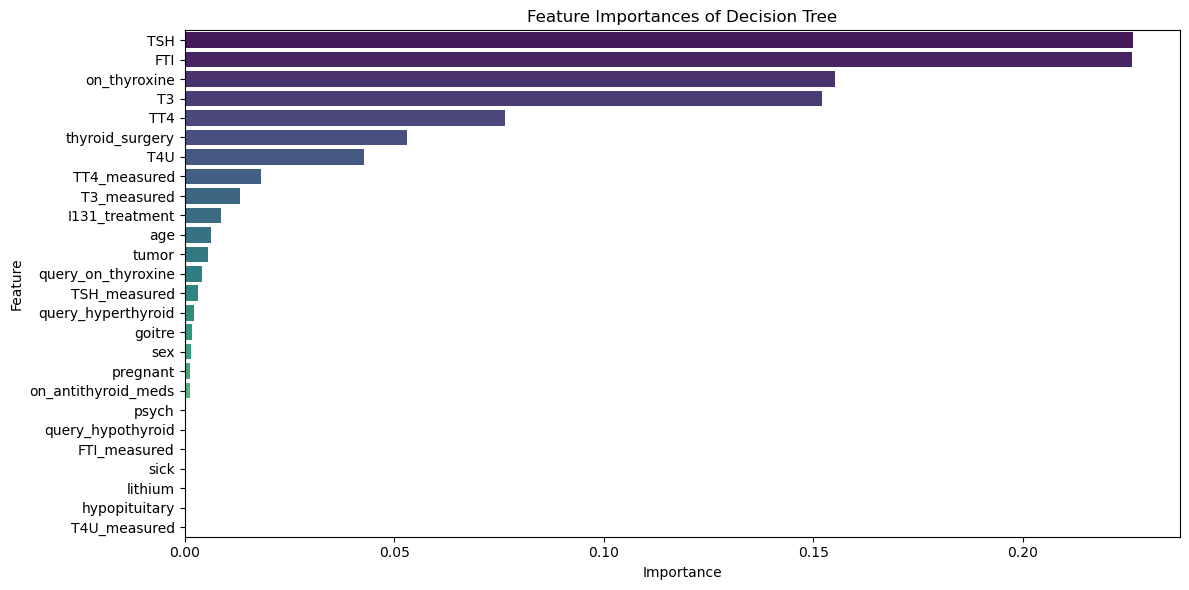

In [258]:
# Optional: Plot feature importances
importances = best_dt.feature_importances_
features = X_train.columns

sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title("Feature Importances of Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# SVM 

In [280]:
# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated f1_macro: 0.7722869628514172


In [282]:
# Define the hyperparameter grid
param_grid = {
    'C': [8, 10, 15],
    'kernel':['rbf', 'poly', 'sigmoid'], 
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 15, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated f1_macro: 0.781806003227077


In [292]:
# Define the hyperparameter grid
param_grid = {
    'C': [13, 15, 18],
    'kernel':['rbf'], 
    'gamma': ['scale'],
    'class_weight': ['balanced']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated f1_macro:", grid_search.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'C': 15, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated f1_macro: 0.781806003227077



Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        29
           1       0.83      0.94      0.89        90
           2       0.97      0.89      0.93      1016
           3       0.57      0.87      0.69       135
           4       0.79      0.88      0.83        50
           5       0.67      0.40      0.50         5

    accuracy                           0.89      1325
   macro avg       0.74      0.76      0.74      1325
weighted avg       0.91      0.89      0.89      1325

Balanced Accuracy: 0.7618
Macro F1-Score: 0.7408


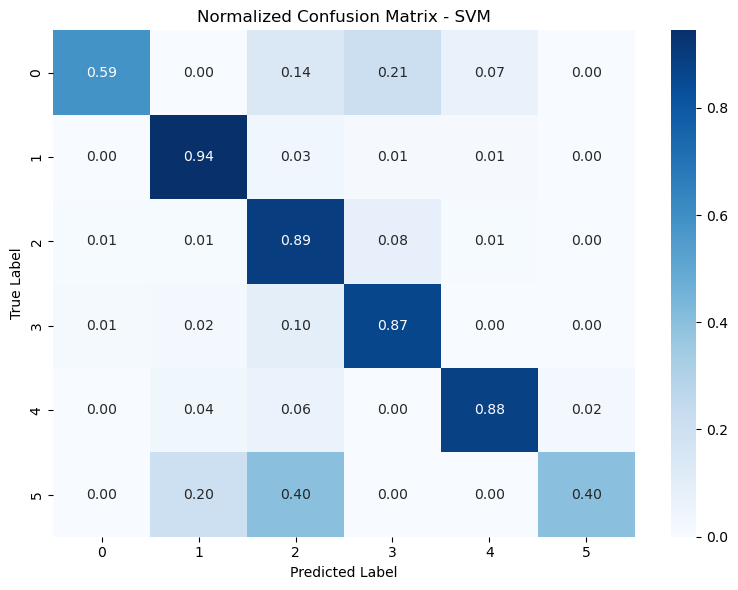

{'Balanced Accuracy': 0.7618364658440684, 'Macro F1-Score': 0.7407955944400664}

In [294]:
# Predict on test data
y_pred = grid_search.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred, model_name="SVM")


# Gradient Boosting

In [298]:
# Initialize base model
gbc = GradientBoostingClassifier(random_state=42)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'min_samples_split': [2, 3, 5, 10]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=20,               # Number of parameter settings sampled
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 4, 'learning_rate': 0.1}
Best Cross-Validated f1_macro: 0.8219814922827522


In [300]:
param_dist = {
    'n_estimators': [180, 200, 250],
    'learning_rate': [0.1, 0.2 , 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'min_samples_split': [2, 3, 5, 10]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=20,              
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.1}
Best Cross-Validated f1_macro: 0.8246446270702172



Classification Report for Gradient Boosting (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.98      0.99      0.98        90
           2       0.96      0.96      0.96      1016
           3       0.77      0.79      0.78       135
           4       0.92      0.96      0.94        50
           5       0.43      0.60      0.50         5

    accuracy                           0.94      1325
   macro avg       0.82      0.82      0.81      1325
weighted avg       0.94      0.94      0.94      1325

Balanced Accuracy: 0.8210
Macro F1-Score: 0.8149


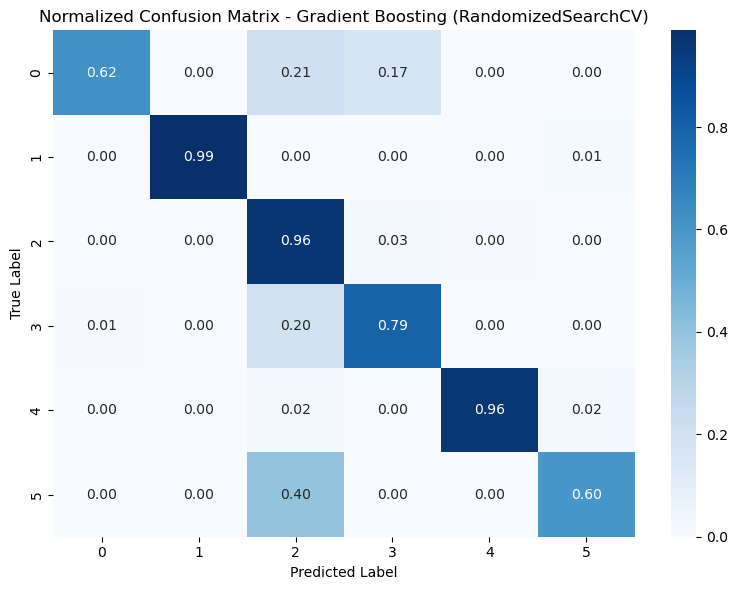

{'Balanced Accuracy': 0.8209589689698747, 'Macro F1-Score': 0.8149468162474846}

In [304]:
# Predict on test set
y_pred = random_search.predict(X_test)

# Evaluate
evaluate_model(y_test, y_pred, model_name="Gradient Boosting (RandomizedSearchCV)")


# ExtraTreesClassifier

In [306]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize base model
et_model = ExtraTreesClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.1, 0.5, 1],
    'bootstrap': [False, True],
    'class_weight': ['balanced']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist,
    n_iter=30,  
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 40, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validated f1_macro: 0.8346021717754543


In [310]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [35, 40, 45],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [1, 2],
    'max_features': [0.1, 0.5],
    'bootstrap': [False, True],
    'class_weight': ['balanced']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist,
    n_iter=30,  
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 35, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validated f1_macro: 0.828711750866632


In [312]:
param_dist = {
    'n_estimators': [90, 100, 110],
    'max_depth': [33, 35, 36],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [0.3, 0.5, 0.8],
    'bootstrap': [False],
    'class_weight': ['balanced']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist,
    n_iter=30,  
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 36, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validated f1_macro: 0.8436213345193035


In [314]:
param_dist = {
    'n_estimators': [85, 87, 90, 93],
    'max_depth': [33, 35, 36],
    'min_samples_split': [5, 6, 7],
    'min_samples_leaf': [1],
    'max_features': [0.8, 1.0],
    'bootstrap': [False],
    'class_weight': ['balanced']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist,
    n_iter=30,  
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 85, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 33, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validated f1_macro: 0.8503797819836099


In [316]:
param_dist = {
    'n_estimators': [83, 84, 85, 86],
    'max_depth': [30, 33, 35, 36],
    'min_samples_split': [4, 5, 6, 7],
    'min_samples_leaf': [1],
    'max_features': [1.0, 'sqrt', 'log2', None],
    'bootstrap': [False],
    'class_weight': ['balanced']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=et_model,
    param_distributions=param_dist,
    n_iter=30,  
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated f1_macro:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 85, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validated f1_macro: 0.8512698803813455


In [318]:
# Evaluate on test set
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))


              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.96      0.99      0.97        90
           2       0.97      0.95      0.96      1016
           3       0.73      0.84      0.78       135
           4       0.87      0.92      0.89        50
           5       1.00      1.00      1.00         5

    accuracy                           0.94      1325
   macro avg       0.90      0.91      0.90      1325
weighted avg       0.94      0.94      0.94      1325

Macro F1 Score: 0.9009781296099101
